<a href="https://colab.research.google.com/github/aytekin827/TIL/blob/main/rPPG_%EB%85%BC%EB%AC%B8%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#**rPPG 논문 테스트용**
---

https://github.com/dnwjddl/remotePPG 참고함


## demo1

### lib

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, filtfilt
from google.colab.patches import cv2_imshow
from google.colab import output

### utils

In [3]:
def calculate_value(img):
    b, g, r = cv2.split(img)
    value = np.mean(g)

    return value

In [4]:
def maxvalue(arr1, arr2):
    value = np.argmax(arr1)
    value = arr2[value]
    return value

In [5]:
def filter_butterworth_bandpass(arr, srate, length, band, order=5):
    try:
        (minFreq, maxFreq) = band
        nyq = srate / 2.0
        n = len(arr)
        pad_factor = max(1, 60 * srate / length)
        n_padded = int(n * pad_factor)
        padded = np.zeros(n_padded)
        padded[:n] = arr[:]

        # filter butterworths
        filter = butter(order, [minFreq / nyq, maxFreq / nyq], 'bandpass')
        bandpassed = filtfilt(*filter, padded)
        bandpassed = bandpassed[:n]
        return bandpassed

    except ValueError:
        return []

In [6]:
def detrend_signal(arr, win_size): #trend(큼직한 변화) 제거하는 함수
    if not isinstance(win_size, int):
        win_size = int(win_size)
    length = len(arr)
    norm = np.convolve(np.ones(length), np.ones(win_size), mode='same')
    mean = np.convolve(arr, np.ones(win_size), mode='same') / norm
    return (arr - mean) / mean

### run rPPG

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cv2_imshow(gray)

x, y, w, h = face_cascade.detectMultiScale(gray,1.2, 5)[0]
face = frame[y:y+h,x:x+w]

cv2_imshow(face)
value = calculate_value(face)
signals.append(value)

# cv2.rectangle(frame, (x+int(0.2*w),y+int(0.2*h)), (x+int(0.8*w), (y+int(0.8*h))), (0,0,255), 2)
cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255),2)

cv2_imshow(frame)

In [44]:
faces == ()

True

face not detected => 473/6711/3592
당신의 심박수는: 64.63610131452388bpm 입니다


<ipython-input-49-61a34eeb0556>:80: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.0, 7,0) #hz 줄여서


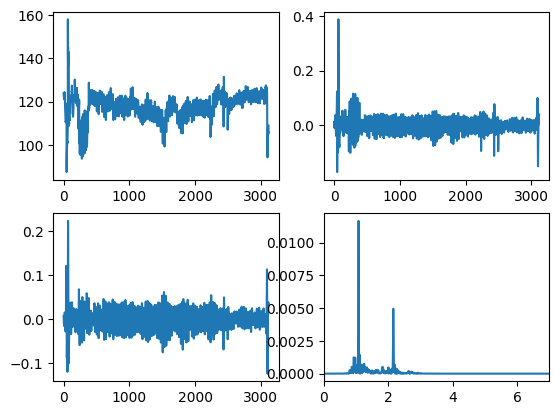

In [49]:
#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('/content/drive/MyDrive/rPPG/쇼룸데이터/트레드밀_정민재_2023-07-26.mp4')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

signals = []

i = 0
is_detected = False
x, y, w, h = 0, 0, 0, 0

tot_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
face_not_detected = 0
while True:
    ok, frame = cap.read()
    if not ok:
        break
    i += 1
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # cv2_imshow(gray)
    # if not is_detected:
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if faces == ():
        output.clear()
        face_not_detected += 1
        print(f'face not detected => {face_not_detected}/{i}/{tot_frames}')
        continue
        # if len(faces) > 0:
        #     max = 0
        #     #find bigger face
        #     for i in range(1,(len(faces))):
        #         if i == 1:
        #             if faces[i-1][2] > faces[i][2]:
        #                 max = i-1
        #             else:
        #                 max = i
        #         else:
        #             if faces[i][2] > faces[max][2]:
        #                 max = i
        #         i+=1
    x, y, w, h = faces[0]
            # is_detected = True

    if w != 0:
        #face = frame[y+int(0.2*h):(y+int(0.8*h)), x+int(0.2*w):x+int(0.8*w)]
        face = frame[y:y+h,x:x+w]

        # cv2.imshow('face', face)
        value = calculate_value(face)
        signals.append(value)

        # cv2.rectangle(frame, (x+int(0.2*w),y+int(0.2*h)), (x+int(0.8*w), (y+int(0.8*h))), (0,0,255), 2)
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255),2)

    # cv2_imshow(frame)
    key = cv2.waitKey(1)
    if key == ord('x'):
        break

    i += 1

det = detrend_signal(signals, 30)
filtered=filter_butterworth_bandpass(det, 30, 900, (0.7, 3.0))
f, P = signal.periodogram(filtered,fs=30.0)



#f, P = signal.periodogram(filtered, 44100, nfft=2 ** 12)

#2행 1열 frame, 추세
#signal, detrend, filtered length 은 300, signal은 list 형식, detrend 는 numpy 형식, filtered numpy 형식
print("당신의 심박수는: {}bpm 입니다".format(maxvalue(P, f) * 60, "10.2f"))

plt.subplot(221)
plt.plot(signals)
plt.subplot(222)
plt.plot(det)
plt.subplot(223)
plt.plot(filtered) #세번쨰 파라미터 bandpass filter 영역
plt.subplot(224)
plt.xlim(0.0, 7,0) #hz 줄여서
plt.plot(f,P)
plt.show()

# cap.release()
# cv2.destroyAllWindows()